In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-methodlines-auto)

We set up the semidiscretization and initial condition in $x$ just as before.

In [2]:
m = 100;  
[x, Dx, Dxx] = diffper(m, [0, 1]);
Ix = eye(m);
u0 = exp( -60 * (x - 0.5).^2 );

Now, however, we apply a standard solver using `solve_ivp` to the initial-value problem $\mathbf{u}'=\mathbf{D}_{xx}\mathbf{u}$.

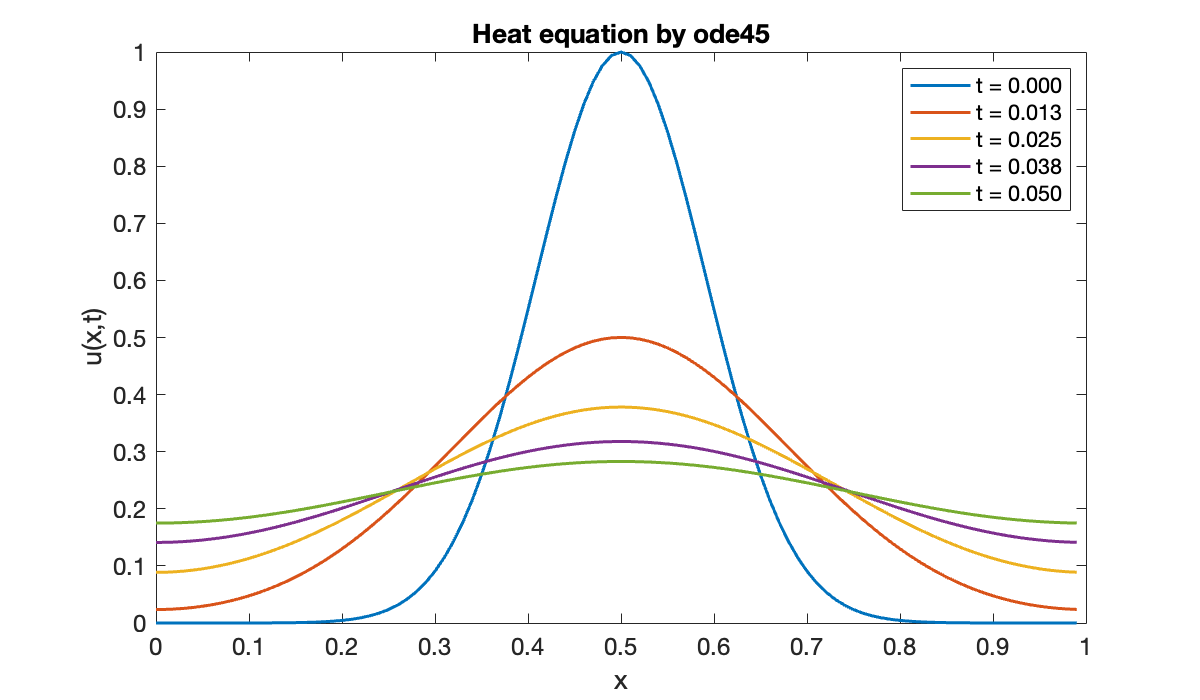

In [3]:
tfinal = 0.05;
f = @(t, u, p) Dxx * u;
ivp = ode(ODEFcn=f);
ivp.InitialTime = 0;
ivp.InitialValue = u0;
ivp.Solver = 'ode45';
[u, sol] = solutionFcn(ivp, 0, tfinal);

clf
for t = linspace(0, 0.05, 5)
    str = sprintf("t = %.3f", t);
    plot(x, u(t), displayname=str)
    hold on
end
xlabel("x"),  ylabel("u(x,t)")
legend()
title("Heat equation by ode45")

The solution appears to be correct. But the number of time steps that were selected automatically is surprisingly large, considering how smoothly the solution changes.

In [4]:
time_steps_ode45 = length(sol.Time) - 1

time_steps_ode45 = 601

Now we apply a different solver called `BDF`.

In [5]:
ivp.Solver = "ode15s";
[u, sol] = solutionFcn(ivp, 0, tfinal);
time_steps_ode15s = length(sol.Time) - 1

time_steps_ode15s = 41

The number of steps selected was reduced by a factor of 20!